In [1]:
%load_ext autotime
import warnings; warnings.filterwarnings('ignore')

In [2]:
from lulc_utils import *
from skimage import exposure
import rasterio, numpy as np, glob, matplotlib.pyplot as plt
import pandas as pd, xarray as xr, scipy.misc as sm
import salem, geopandas as gpd
from facets import facets
from rasterio import plot 

time: 1.06 s


In [3]:
# cloud correction
band = [5, 4, 3]

# for fold in sorted(glob.glob('/mnt/ext1/data/sur/lulc/cloud/*T1*')):
#     tiles = sorted(glob.glob(fold + '/*tile*'))
#     for tile in tiles:
#         stack_file = tile + '/stack.tif'
#         fcc_file = tile + '/fcc.tif'
#         ofile = fcc_file.split('.tif')[0] + '.acorr.tif'
#         print ofile
#         conv = DNConversion(tile).to_reflectance(stack_file)
#         conv.get_composite(ofile = fcc_file, stackfile = stack_file, band = band)
#         atm = AtmosCorrection(fcc_file).correct(ofile, model = -1)

time: 2 ms


In [4]:
# cloud correction
files_to_merge = []
fcc_list = []
base = '/mnt/ext1/data/sur/lulc/'
folds = glob.glob('/mnt/ext1/data/sur/lulc/cloud/*T1*')
for fold in folds:
    fcc_file = fold + '/tile1/fcc.tif'
    file1 = fold + '/tile1/fcc.acorr.tif'
    mask1 = fold + '/tile1/mask.tif'
    file2 = fold + '/tile2/fcc.acorr.tif'
    ofile = fold + '/fcc.both.tif'    
    files_to_merge.append(ofile)
    fcc_list.append(fcc_file)
    print ofile
    
#     try:
#         corr = CloudCorrection(file1, mask1, file2).correct(ofile)
#     except:
#         file3 = fold + '/tile2/fcc1.tif'
#         !rio warp --overwrite $file2 $file3 --like $file1
#         corr = CloudCorrection(file1, mask1, file3).correct(ofile)

/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134040_20150312_20170412_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134041_20150312_20170412_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134042_20150312_20170412_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135041_20150725_20170406_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135042_20151114_20170402_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135043_20150319_20170412_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135044_20150130_20170413_01_T1/fcc.both.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135045_20150130_20170413_01_T1/fcc.both.tif
time: 120 ms


In [5]:
# No cloud correction
for fold in sorted(glob.glob('/mnt/ext1/data/sur/lulc/cloudless/*')):
    stack_file = fold + '/stack.tif'
    fcc_file = fold + '/fcc.tif'
    ofile = fcc_file.split('.tif')[0] + '.acorr.tif'
    print ofile
#     conv = DNConversion(fold).to_reflectance(stack_file)
#     conv.get_composite(ofile = fcc_file, stackfile = stack_file, band = band)
#     atm = AtmosCorrection(fcc_file).correct(ofile, model = -1)
    files_to_merge.append(ofile)
    fcc_list.append(fcc_file)

/mnt/ext1/data/sur/lulc/cloudless/tile1/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile10/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile11/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile12/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile13/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile14/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile2/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile3/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile4/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile5/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile6/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile7/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile8/fcc.acorr.tif
/mnt/ext1/data/sur/lulc/cloudless/tile9/fcc.acorr.tif
time: 81.4 ms


In [6]:
final = []
for afile in files_to_merge:
    #print afile
    cfile = afile.split('.tif')[0] + '.color.tif'
    wgs = afile.split('.tif')[0] + '.color.wgs84.tif'
    print wgs
    clr = ColorCorrection().color_balancing(afile, cfile)
    wgs1 = reproject_dataset(cfile)
    final.append(wgs)

/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134040_20150312_20170412_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134041_20150312_20170412_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_134042_20150312_20170412_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135041_20150725_20170406_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135042_20151114_20170402_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135043_20150319_20170412_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135044_20150130_20170413_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloud/LC08_L1TP_135045_20150130_20170413_01_T1/fcc.both.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloudless/tile1/fcc.acorr.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloudless/tile10/fcc.acorr.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloudless/tile11/fcc.acorr.color.wgs84.tif
/mnt/ext1/data/sur/lulc/cloudles

In [7]:
# mosaicing of files
shapefile = '/home/pankaj/phd/practice/sur/data/neshpfile/NE_utm.shp'
base = '/mnt/ext1/data/sur/lulc/'
mosfile = base + 'mosaic.tif'
cropfile = base + 'clipped.tif'
anl = Analysis()
anl.get_mosaic(final, mosfile)
!gdalwarp -overwrite -t_srs EPSG:4326 -cutline $shapefile -crop_to_cutline -dstalpha $mosfile $cropfile

Creating output file that is 26618P x 25917L.
Processing input file /mnt/ext1/data/sur/lulc/mosaic.tif.
Using internal nodata values (e.g. 0) for image /mnt/ext1/data/sur/lulc/mosaic.tif.
Copying nodata values from source /mnt/ext1/data/sur/lulc/mosaic.tif to destination /mnt/ext1/data/sur/lulc/clipped.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
time: 17min 59s


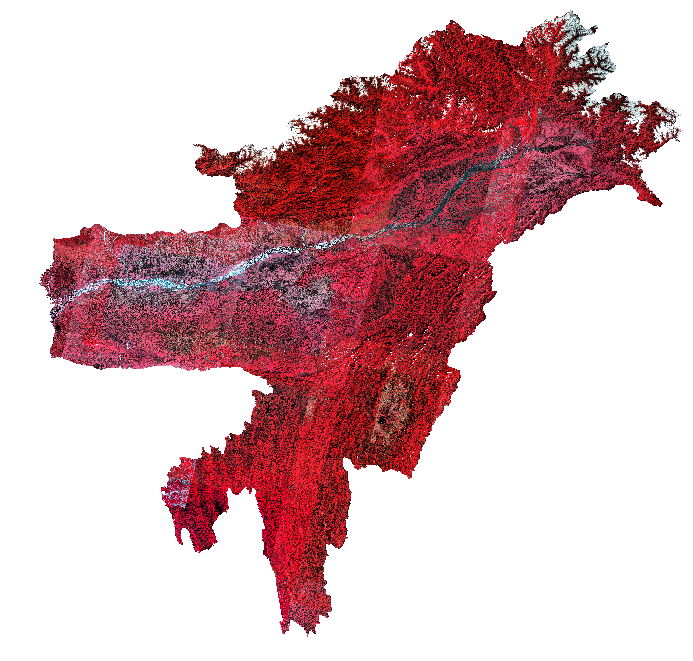

time: 1min 4s


In [8]:
fig, ax = facets(1, 1, width=15, aspect=0.6); ax=ax[0]
with rasterio.open(cropfile) as data:
    im = reshape_as_image(data.read()[:, ::10, ::10])
ax.imshow(im)
ax.axis('off')
plt.show()